In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

## Data preparation

In [208]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [209]:
df_train.head()

,id,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,is_rich
0,9768,41,Private,130408,HS-grad,9,Divorced,Sales,Unmarried,Black,Female,0,0,38,United-States,0
1,9769,17,Private,57723,11th,7,Never-married,Sales,Own-child,White,Male,0,0,30,United-States,0
2,9770,34,Private,127875,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,20,United-States,0
3,9771,42,Private,142424,Assoc-voc,11,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
4,9772,39,Self-emp-not-inc,185366,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,United-States,1


In [210]:
df_test.head()

,id,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0,29,State-gov,356089,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,40,United-States
1,1,23,Private,161874,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,40,United-States
2,2,59,Self-emp-inc,95835,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States
3,3,40,Private,146520,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
4,4,20,Private,180497,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Female,0,0,40,United-States


In [211]:
df_train.shape

(39074, 16)

In [212]:
df_train.describe()

,id,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,is_rich
count,39074.000000,39074.000000,3.907400e+04,39074.000000,39074.000000,39074.000000,39074.000000,39074.000000
mean,29304.500000,38.694631,1.895940e+05,10.074576,1046.173875,87.393433,40.433895,0.239520
std,11279.836546,13.731323,1.058920e+05,2.572794,7302.852120,403.706583,12.373732,0.426796
min,9768.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,19536.250000,28.000000,1.174770e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,29304.500000,37.000000,1.781505e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,39072.750000,48.000000,2.371285e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,48841.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [213]:
df_train.describe(include=['object'])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,39074,39074,39074,39074,39074,39074,39074,39074
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,27106,12629,17927,4946,15828,33418,26162,35074


In [214]:
((df_train.isna().sum() / len(df_train))*100).sort_values(ascending=False)

id                 0.0
age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
is_rich            0.0
dtype: float64

In [215]:
# Проверяем уникальные значения в каждом признаке и их количество

for column in df_train.columns:
    print(df_train[column].value_counts(), '\n')

9768     1
35819    1
35812    1
35813    1
35814    1
        ..
22794    1
22795    1
22796    1
22797    1
48841    1
Name: id, Length: 39074, dtype: int64 

33    1084
36    1074
31    1073
35    1072
23    1050
      ... 
88       6
85       5
87       2
86       1
89       1
Name: age, Length: 74, dtype: int64 

Private             27106
Self-emp-not-inc     3091
Local-gov            2517
?                    2247
State-gov            1567
Self-emp-inc         1365
Federal-gov          1157
Without-pay            17
Never-worked            7
Name: workclass, dtype: int64 

203488    18
190290    17
120277    16
125892    15
186934    15
          ..
53448      1
172712     1
83082      1
113545     1
186350     1
Name: fnlwgt, Length: 24603, dtype: int64 

HS-grad         12629
Some-college     8688
Bachelors        6431
Masters          2126
Assoc-voc        1628
11th             1452
Assoc-acdm       1313
10th             1114
7th-8th           775
Prof-school       647
9th    

In [216]:
# Объединяем по смыслу некоторые значения категориальных признаков, для улучшения качества будущей модели

df_train['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'], 'dropout',inplace=True)
df_train['education'].replace(['Some-college','Assoc-acdm','Assoc-voc'], 'CommunityCollege',inplace=True)
df_train['education'].replace('Prof-school','Masters',inplace=True)

df_test['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'], 'dropout',inplace=True)
df_test['education'].replace(['Some-college','Assoc-acdm','Assoc-voc'], 'CommunityCollege',inplace=True)
df_test['education'].replace('Prof-school','Masters',inplace=True)


In [217]:
df_train['marital-status'].replace(['Married-spouse-absent','Never-married'], 'NotMarried',inplace=True)
df_train['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse'], 'Married',inplace=True)
df_train['marital-status'].replace('Divorced', 'Separated',inplace=True)

df_test['marital-status'].replace(['Married-spouse-absent','Never-married'], 'NotMarried',inplace=True)
df_test['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse'], 'Married',inplace=True)
df_test['marital-status'].replace('Divorced', 'Separated',inplace=True)

In [218]:
df_train['workclass'].replace(['Local-gov','State-gov','Federal-gov'], value = 'Government',inplace = True)
df_train['workclass'].replace(['Self-emp-not-inc','Self-emp-inc '], value = 'Self',inplace = True)

df_test['workclass'].replace(['Local-gov','State-gov','Federal-gov'], value = 'Government',inplace = True)
df_test['workclass'].replace(['Self-emp-not-inc','Self-emp-inc '], value = 'Self',inplace = True)

In [219]:
df_train['occupation'].replace(['Other-service','Protective-serv','Priv-house-serv'], value = 'Service',inplace = True)

In [220]:
df_train = df_train.drop('educational-num', axis=1)
df_test = df_test.drop('educational-num', axis=1)

In [221]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39074 entries, 0 to 39073
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              39074 non-null  int64 
 1   age             39074 non-null  int64 
 2   workclass       39074 non-null  object
 3   fnlwgt          39074 non-null  int64 
 4   education       39074 non-null  object
 5   marital-status  39074 non-null  object
 6   occupation      39074 non-null  object
 7   relationship    39074 non-null  object
 8   race            39074 non-null  object
 9   gender          39074 non-null  object
 10  capital-gain    39074 non-null  int64 
 11  capital-loss    39074 non-null  int64 
 12  hours-per-week  39074 non-null  int64 
 13  native-country  39074 non-null  object
 14  is_rich         39074 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.5+ MB


In [222]:
df_train.duplicated().sum()

0

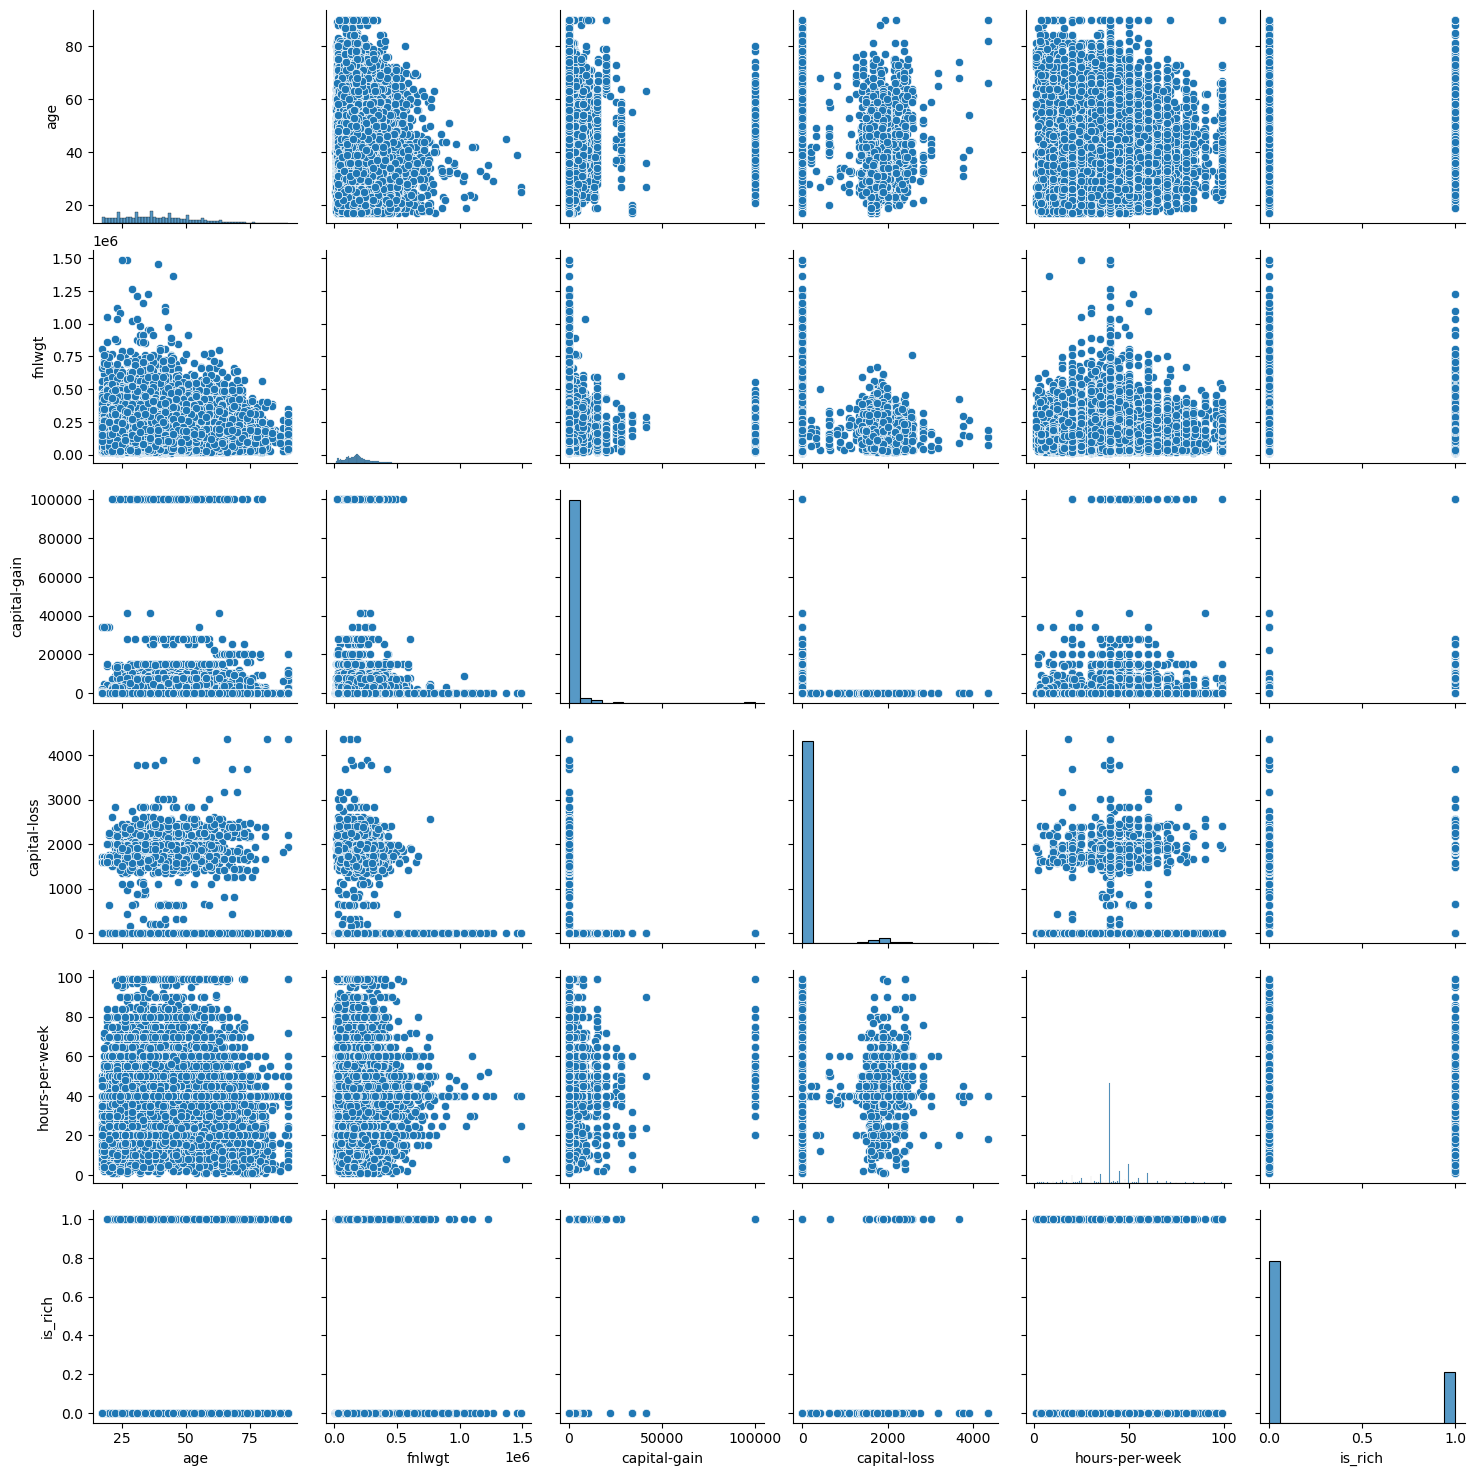

In [223]:
sns.pairplot(df_train.drop(columns=['id']))

In [224]:
x_train = df_train.drop(['id', 'is_rich', 'capital-gain', 'capital-loss'], axis=1)
y_train = df_train['is_rich']

x_test = df_test.drop(['id', 'capital-gain', 'capital-loss'], axis=1)

In [225]:
num_columns = ['age', 'fnlwgt', 'hours-per-week']

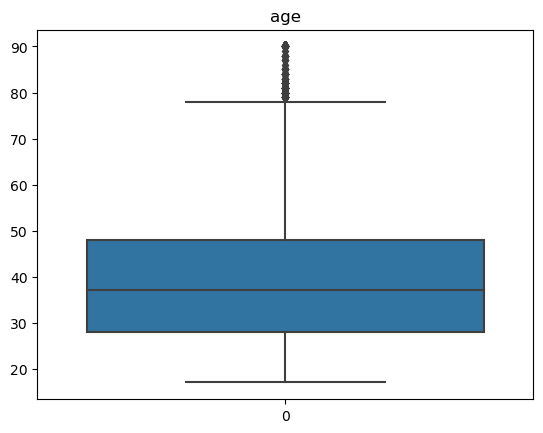

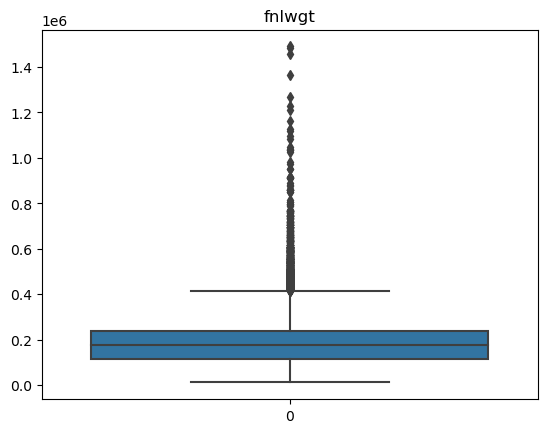

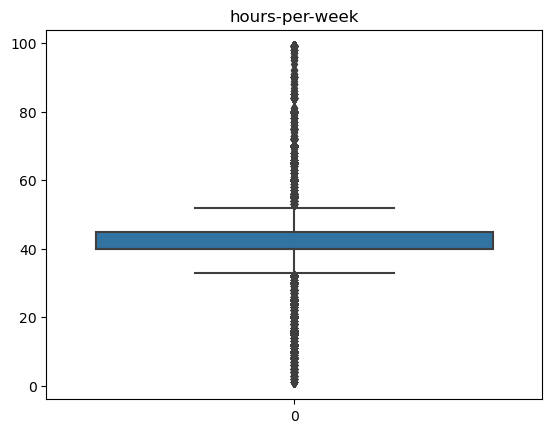

In [226]:
# Проверяем визуально выбросы

for column in num_columns:
    plt.figure()
    sns.boxplot(x_train[column])
    plt.title(column)

In [227]:
def get_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

In [228]:
# Заменяем выбросы граничным значением 

for column in num_columns:
    x_train.loc[x_train[column] > get_outliers(x_train[column])[1], column] = get_outliers(x_train[column])[1]
    x_train.loc[x_train[column] < get_outliers(x_train[column])[0], column] = get_outliers(x_train[column])[0]
    x_test.loc[x_test[column] > get_outliers(x_train[column])[1], column] = get_outliers(x_train[column])[1]
    x_test.loc[x_test[column] < get_outliers(x_train[column])[0], column] = get_outliers(x_train[column])[0]

In [229]:
cat_columns = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country']

In [230]:
# Заменяем знак '?' значением 'Other'

imp_const = SimpleImputer(missing_values='?', strategy='constant', fill_value='Other')
x_train[cat_columns] = imp_const.fit_transform(x_train[cat_columns])
x_test[cat_columns] = imp_const.transform(x_test[cat_columns])

In [231]:
# Заменяем низкочастотные значения признаков на 'Other'

for column in x_train[cat_columns]:
    serie = x_train[column].value_counts()
    serie = serie / serie.sum() * 100
    keep_cats = serie[serie > 5].index
    x_train[column] = np.where(x_train[column].isin(keep_cats), x_train[column], 'Other')
    x_test[column] = np.where(x_test[column].isin(keep_cats), x_test[column], 'Other')    

In [232]:
for column in cat_columns:
    print(x_train[column].value_counts(), '\n')

Private       27106
Government     5241
Other          3636
Self           3091
Name: workclass, dtype: int64 

HS-grad             12629
CommunityCollege    11629
Bachelors            6431
dropout              5140
Masters              2773
Other                 472
Name: education, dtype: int64 

Married       17953
NotMarried    13338
Separated      6563
Other          1220
Name: marital-status, dtype: int64 

Other                8126
Prof-specialty       4946
Service              4917
Craft-repair         4904
Exec-managerial      4859
Adm-clerical         4478
Sales                4465
Machine-op-inspct    2379
Name: occupation, dtype: int64 

Husband          15828
Not-in-family    10147
Own-child         5993
Unmarried         4074
Other             3032
Name: relationship, dtype: int64 

White    33418
Black     3750
Other     1906
Name: race, dtype: int64 

Male      26162
Female    12912
Name: gender, dtype: int64 

United-States    35074
Other             4000
Name: native-

In [233]:
# Стандартизируем числовые признаки

scaler = StandardScaler()
x_train[num_columns] = scaler.fit_transform(x_train[num_columns])
x_test[num_columns] = scaler.transform(x_test[num_columns]) 

In [234]:
x_train.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,0.170953,Private,-0.590297,HS-grad,Separated,Sales,Unmarried,Black,Female,-0.517957,United-States
1,-1.588035,Private,-1.353614,dropout,NotMarried,Sales,Own-child,White,Male,-1.408414,United-States
2,-0.342085,Private,-0.616898,Bachelors,NotMarried,Adm-clerical,Not-in-family,White,Female,-1.408414,United-States
3,0.244245,Private,-0.464108,CommunityCollege,NotMarried,Adm-clerical,Not-in-family,White,Female,-0.194154,United-States
4,0.024371,Self,-0.013144,CommunityCollege,Married,Craft-repair,Husband,White,Male,-1.003661,United-States


In [235]:
# Преобразуем категориальные данные

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

x_train[ohe.get_feature_names_out()] = ohe.fit_transform(x_train[cat_columns])
x_test[ohe.get_feature_names_out()] = ohe.transform(df_test[cat_columns])

c:\Users\mayor\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [236]:
x_train = x_train.drop(columns=cat_columns)
x_train.head()

,age,fnlwgt,hours-per-week,workclass_Other,workclass_Private,workclass_Self,education_CommunityCollege,education_HS-grad,education_Masters,education_Other,...,occupation_Sales,occupation_Service,relationship_Not-in-family,relationship_Other,relationship_Own-child,relationship_Unmarried,race_Other,race_White,gender_Male,native-country_United-States
0,0.170953,-0.590297,-0.517957,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.588035,-1.353614,-1.408414,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
2,-0.342085,-0.616898,-1.408414,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.244245,-0.464108,-0.194154,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.024371,-0.013144,-1.003661,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [237]:
x_test = x_test.drop(columns=cat_columns)
x_test.head()

,age,fnlwgt,hours-per-week,workclass_Other,workclass_Private,workclass_Self,education_CommunityCollege,education_HS-grad,education_Masters,education_Other,...,occupation_Sales,occupation_Service,relationship_Not-in-family,relationship_Other,relationship_Own-child,relationship_Unmarried,race_Other,race_White,gender_Male,native-country_United-States
0,-0.708541,1.779741,-0.194154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,-1.148288,-0.259850,-0.194154,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,1.490194,-0.953373,1.829613,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.097662,-0.421093,-0.194154,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,-1.368161,-0.064276,-0.194154,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Modeling

In [238]:
kf = StratifiedKFold(n_splits=5)

In [248]:
params = {'hidden_layer_sizes': [(200,150,100),(150,100,50)],
          'max_iter': [100,300,500],
          'activation': ['relu','logistic','tanh'],
          'solver': ['sgd','adam', 'lbfgs'],
          'alpha': [0.0001,0.001, 0.01],
          'learning_rate': ['adaptive','constant', 'invscaling']}

gs = RandomizedSearchCV(MLPClassifier(), params, cv=kf, scoring='f1_micro', n_jobs=-1)
gs.fit(x_train, y_train)

print('Лучшие параметры: ', gs.best_params_)
print('Лучший результат: ', gs.best_score_)

In [239]:
params = {'n_estimators' : [100, 300, 500],
          'max_depth': np.arange(2, 25, 2),
          'max_features': ['sqrt', 'log2', None],
          'min_samples_leaf': np.arange(1, 10, 1),
          'min_samples_split': np.arange(2, 20, 1),
          'class_weight': ['balanced', 'balanced_subsample', None]}

gs = RandomizedSearchCV(RandomForestClassifier(), params, cv=kf, scoring='f1_micro', n_jobs=-1)
gs.fit(x_train, y_train)

print('Лучшие параметры: ', gs.best_params_)
print('Лучший результат: ', gs.best_score_)

Лучшие параметры:  {'n_estimators': 300, 'min_samples_split': 14, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': None}
Лучший результат:  0.8379229596106926


In [35]:
params = {'n_neighbors' : np.arange(1, 50, 1),
          'weights': ['uniform', 'distance'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
          'leaf_size': np.arange(20, 70, 1),
          'p': (1,2)}

gs = RandomizedSearchCV(KNeighborsClassifier(), params, cv=kf, scoring='f1_micro', n_jobs=-1, n_iter=50)
gs.fit(x_train, y_train)

print('Лучшие параметры: ', gs.best_params_)
print('Лучший результат: ', gs.best_score_)

Лучшие параметры:  {'weights': 'uniform', 'p': 1, 'n_neighbors': 49, 'leaf_size': 44, 'algorithm': 'brute'}
Лучший результат:  0.8324973876800683


In [240]:
params = {"loss":["log_loss", "exponential"],
          "learning_rate": [0.01,0.1,1,10,100],
          'max_depth': np.arange(2, 25, 2),
          'max_features': ['sqrt', 'log2', None],
          'min_samples_leaf': np.arange(1, 10, 1),
          'min_samples_split': np.arange(2, 20, 1),
          "max_features":["log2","sqrt"],
          "criterion": ["friedman_mse",  "squared_error"],
          "subsample":np.arange(0.1, 1, 0.1),
          "n_estimators":[100, 300, 500]}

gs = RandomizedSearchCV(GradientBoostingClassifier(), params, cv=kf, scoring='f1_micro', n_jobs=-1)
gs.fit(x_train, y_train)

print('Лучшие параметры: ', gs.best_params_)
print('Лучший результат: ', gs.best_score_)

Лучшие параметры:  {'subsample': 0.6, 'n_estimators': 300, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 6, 'loss': 'log_loss', 'learning_rate': 0.1, 'criterion': 'squared_error'}
Лучший результат:  0.8352102113092943


In [36]:
model = KNeighborsClassifier(weights ='uniform', n_neighbors=49, algorithm='brute', p=1, leaf_size=44)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=44, n_neighbors=49, p=1)

In [37]:
test_pred = model.predict(x_test)

In [38]:
df_submission = pd.DataFrame(data= {
    'id': df_test['id'],
    'is_reach': test_pred
})
df_submission.head()

,id,is_reach
0,0,1
1,1,0
2,2,1
3,3,1
4,4,0


In [39]:
df_submission.to_csv('submission.csv', index=False)